# 非凸函数: 神经网络的损失函数

> 用于可视化神经网络损失景观的势函数公式如下：
> 
> $$
> \begin{aligned}
> L(w_1, w_2) = & \underbrace{(w_1^2 + w_2^2 - 1)^2}_{\text{主盆地}} + \underbrace{0.1 \cdot \sin(15w_1) \cdot \sin(15w_2)}_{\text{高频振荡}} \\
> & + \underbrace{0.05 \cdot (w_1^4 + w_2^4)}_{\text{正则化项}} + \underbrace{0.3 \cdot \exp\left(-\frac{(w_1-0.8)^2 + (w_2+0.8)^2}{0.1}\right)}_{\text{局部极小值}}
> \end{aligned}
> $$
> 
> 其中：
> - $w_1, w_2$ 是二维权重空间中的坐标
> - 第一项 $(w_1^2 + w_2^2 - 1)^2$ 创建环形的主盆地
> - 第二项 $0.1 \cdot \sin(15w_1) \cdot \sin(15w_2)$ 引入高频振荡，模拟神经网络中的复杂非线性
> - 第三项 $0.05 \cdot (w_1^4 + w_2^4)$ 作为正则化项，惩罚大权重
> - 第四项 $0.3 \cdot \exp\left(-\frac{(w_1-0.8)^2 + (w_2+0.8)^2}{0.1}\right)$ 在特定位置创建一个额外的局部极小值
> 
> 这个势函数的设计旨在模拟真实神经网络损失函数的关键特征：**多个局部极小值、复杂的优化地形、高频振荡和高维耦合效应**。

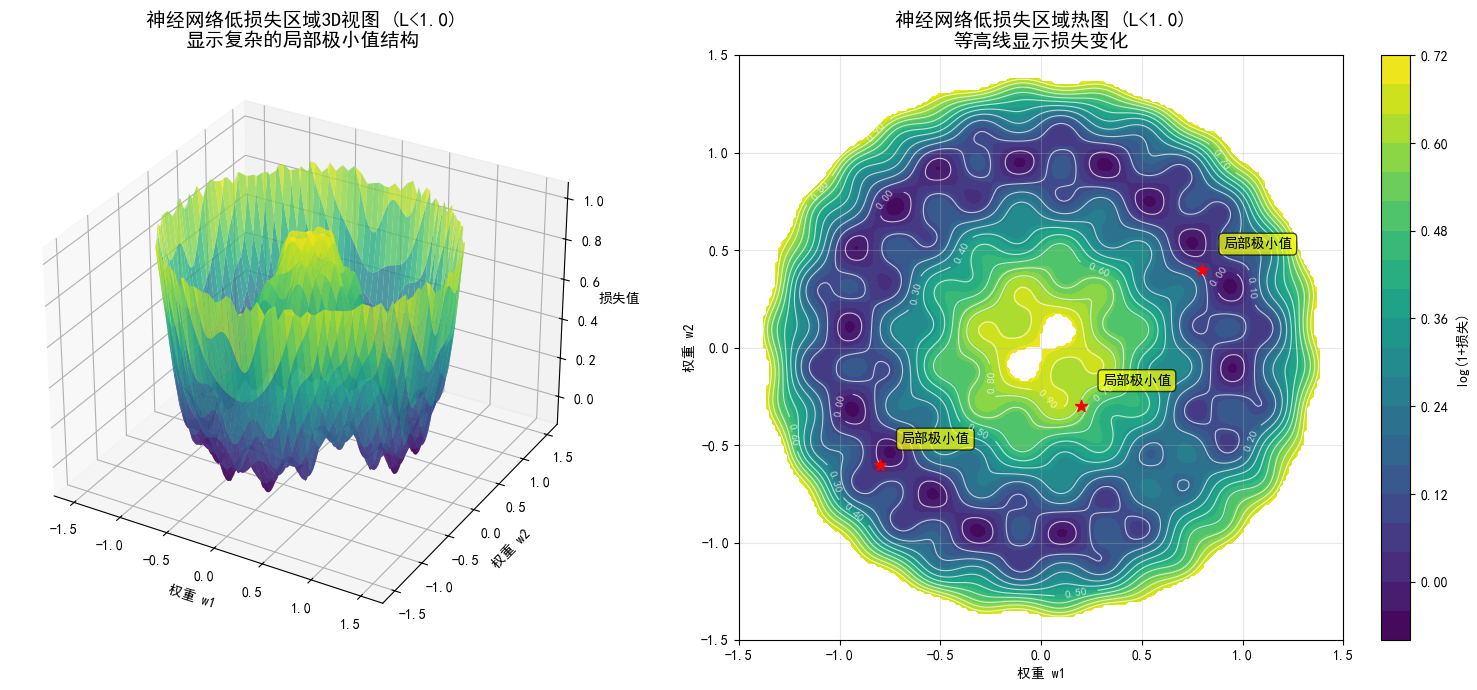

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 模拟神经网络损失函数
def neural_net_loss(w1, w2):
    """模拟神经网络损失函数的复杂景观"""
    main_basin = (w1**2 + w2**2 - 1)**2
    high_freq = 0.1*np.sin(15*w1)*np.sin(15*w2)
    regularization = 0.05*(w1**4 + w2**4)
    local_minima = 0.3*np.exp(-((w1-0.8)**2 + (w2+0.8)**2)/0.1)
    return main_basin + high_freq + regularization + local_minima

# 创建网格
w1 = np.linspace(-1.5, 1.5, 200)
w2 = np.linspace(-1.5, 1.5, 200)
W1, W2 = np.meshgrid(w1, w2)
Z = neural_net_loss(W1, W2)

# 只关注低损失区域（损失小于1.0）
mask = Z < 1.0
Z_focused = np.where(mask, Z, np.nan)

# 创建包含两个子图的图形
fig = plt.figure(figsize=(16, 7))

# 1. 3D图 - 低损失区域
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W1, W2, Z_focused, cmap='viridis', alpha=0.8, 
                       linewidth=0, antialiased=True)
ax1.set_title('神经网络低损失区域3D视图 (L<1.0)\n显示复杂的局部极小值结构', fontsize=14)
ax1.set_xlabel('权重 w1')
ax1.set_ylabel('权重 w2')
ax1.set_zlabel('损失值')

# 2. 热图 - 低损失区域
ax2 = fig.add_subplot(122)
heatmap = ax2.contourf(W1, W2, np.log1p(Z_focused), levels=20, cmap='viridis')
cbar = plt.colorbar(heatmap, ax=ax2)
cbar.set_label('log(1+损失)')

# 添加等高线
contour = ax2.contour(W1, W2, Z_focused, levels=10, colors='white', alpha=0.7, linewidths=0.8)
ax2.clabel(contour, inline=True, fontsize=8, fmt='%.2f')

ax2.set_title('神经网络低损失区域热图 (L<1.0)\n等高线显示损失变化', fontsize=14)
ax2.set_xlabel('权重 w1')
ax2.set_ylabel('权重 w2')
ax2.grid(True, alpha=0.3)

# 标记几个典型的局部极小值点
minima_points = [(-0.8, -0.6), (0.2, -0.3), (0.8, 0.4)]
for point in minima_points:
    # 在热图上标记
    ax2.scatter(*point, color='red', s=80, zorder=5, marker='*')
    ax2.annotate('局部极小值', point, xytext=(15, 15), 
                textcoords='offset points', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    # 在3D图上标记
    z_val = neural_net_loss(point[0], point[1])
    ax1.scatter([point[0]], [point[1]], [z_val], color='red', s=100, marker='*')

plt.tight_layout()
plt.savefig('neural_net_loss_comprehensive.svg', format='svg', dpi=300)
plt.show()